# 二维向量

本文档描述了二维向量的一些数学知识在编程方面的应用, 包括:
- 在坐标系上绘制二维向量 (坐标点)
- 求二维向量的长度 (原点到坐标点的长度, 勾股定理)
- 二维向量的加减 (向量叠加)
- 二维向量和标量的运算
- 二维向量的距离 (即两个二维向量相减所得向量的长度)


## 1. 向量绘制


### 1.1. 绘制向量

**知识:** 向量是一组数的集合, 集合中的每个数表示坐标系上的一个值. 对于二维向量, 是由 `(x, y)` 两个数组成, 分别表示在二维坐标系上 `x` 轴和 `y` 轴两个坐标值


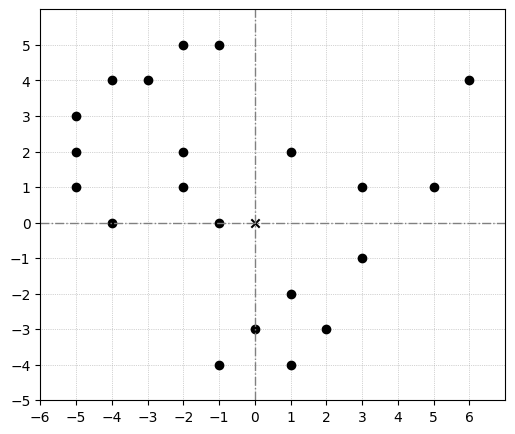

In [1]:
from utils.draw.component import Points2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 在坐标轴上绘制向量集合, 即二维坐标系上的一组点
draw2d([Points2D(dino_vectors, show_coord=False)])

**知识:** 在向量绘制的基础上, 将其中的两个点用线段连接


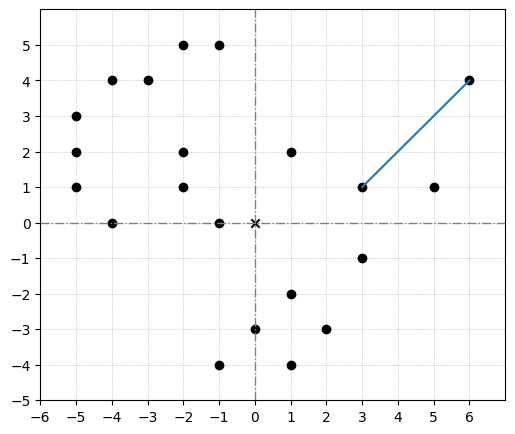

In [2]:
from utils.draw.component import Points2D, Segment2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 在坐标轴上绘制向量集合, 并绘制一条线段连接向量中的两个点
draw2d(
    [
        Points2D(dino_vectors, show_coord=False),
        Segment2D((6, 4), (3, 1)),
    ]
)

**知识:** 在向量绘制的基础上, 绘制一组线段, 将向量中的每个点两两进行连接, 绘制一个恐龙图形


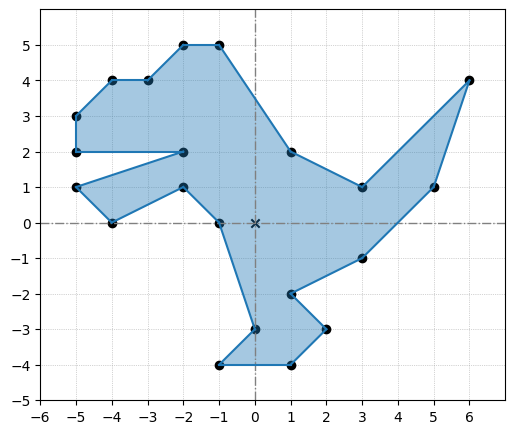

In [3]:
from utils.draw.component import Color, Points2D, Polygon2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 在坐标轴上绘制向量集合, 并绘制一组线段组成的多边形
draw2d(
    [
        Points2D(dino_vectors, show_coord=False),
        Polygon2D(dino_vectors, fill=Color.blue()),
    ]
)

**知识:** 绘制公式 $y=x^2$ 时, 每个 `(x, y)` 坐标的图


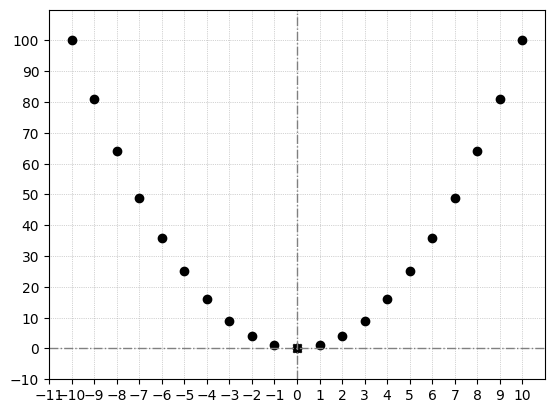

In [4]:
from utils.draw.component import Points2D, draw2d

# 产生 y = x ^ 2 的点集
vs = [(x, x**2) for x in range(-10, 11)]

# 绘制点集
draw2d(
    [Points2D(vs, show_coord=False)],
    grid=(1, 10),
    nice_aspect_ratio=False,
)

## 2. 向量计算


#### 2.1. 向量相加

**知识:** 向量相加即将向量的对应分量相加, 得到新向量, 例如: `(1, 2) + (3, 4) = (4, 6)`

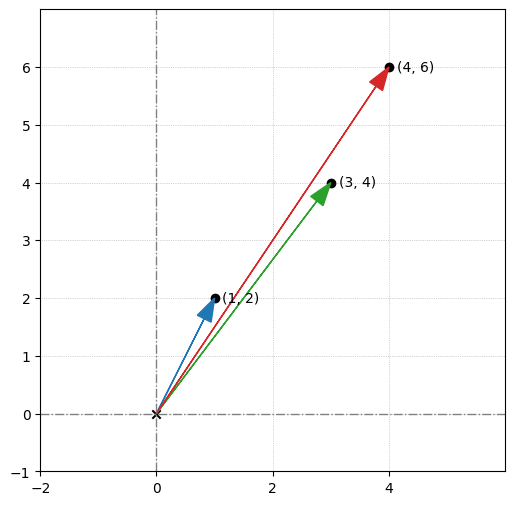

In [5]:
from utils.draw.component import Arrow2D, Color, Points2D, draw2d

# 定义两个向量
v1, v2 = (1, 2), (3, 4)

# 计算向量相加的结果
vr = (v1[0] + v2[0], v1[1] + v2[1])

# 绘制三个向量
draw2d(
    [
        Points2D([v1, v2, vr]),  # 绘制向量点
        Arrow2D(v1, color=Color.blue()),  # 绘制到 v1 的箭头
        Arrow2D(v2, color=Color.green()),  # 绘制到 v2 的箭头
        Arrow2D(vr),  # 绘制到 vr 的箭头
    ],
    grid=(2, 1),
)

可以理解为, 向量 `v1` 和 `v2` 首尾相接后得到 `vr`. 所以, 利用向量加法, 可以将向量进行移动

**知识:** 移动一个点, 即给点坐标的 `x` 和 `y` 两个分量增加偏移量


In [6]:
from utils.typedef import Vector2D


def add(v1: Vector2D, v2: Vector2D) -> Vector2D:
    """将向量 `v1` 和 `v2` 相加

    Args:
        `v1` (`Vector2D`): 相加的两个向量之一
        `v2` (`Vector2D`): 相加的两个向量之一

    Returns:
        `Vector2D`: 向量相加之和
    """
    return (v1[0] + v2[0], v1[1] + v2[1])

**知识:** 移动一个向量, 即将向量中的所有点进行移动


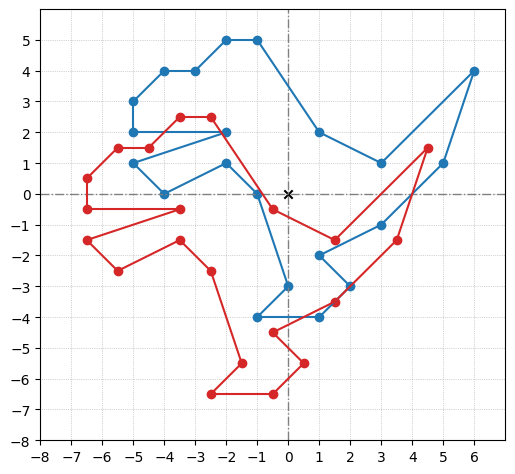

In [7]:
from utils.vector import add, as_vector2d
from utils.draw.component import Color, Points2D, Polygon2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 将向量进行移动, 即将向量中的每个点进行偏移
dino_vectors2 = [as_vector2d(add(v, (-1.5, -2.5))) for v in dino_vectors]

# 绘制偏移前的向量和偏移后的向量
draw2d(
    [
        Points2D(dino_vectors, color=Color.blue(), show_coord=False),
        Polygon2D(dino_vectors, color=Color.blue()),
        Points2D(dino_vectors2, color=Color.red(), show_coord=False),
        Polygon2D(dino_vectors2, color=Color.red()),
    ]
)

**知识:** 将偏移前后的两个向量对应点进行连接, 即可绘制向量偏移的位移. 通过此方法, 将恐龙图形移动到新的位置


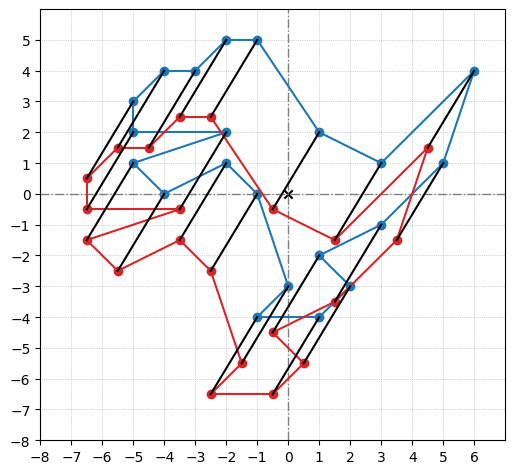

In [8]:
from utils.vector import add, as_vector2d
from utils.draw.component import Color, Points2D, Polygon2D, Segment2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 将向量进行移动, 即将向量中的每个点进行偏移
dino_vectors2 = [as_vector2d(add(v, (-1.5, -2.5))) for v in dino_vectors]

# 计算两个向量偏移的位移
arrows = [
    Segment2D(tip, tail, color=Color.black())  # 以获取的点组成线段对象集合
    for tip, tail in zip(dino_vectors2, dino_vectors)  # 获取两个向量对应的点
]

# 用线段将偏移前后的两个向量的对应点进行连接
draw2d(
    [
        Points2D(dino_vectors, color=Color.blue(), show_coord=False),
        Polygon2D(dino_vectors, color=Color.blue()),
        Points2D(dino_vectors2, color=Color.red(), show_coord=False),
        Polygon2D(dino_vectors2, color=Color.red()),
        *arrows,
    ]
)

### 2.2. 向量长度

向量的长度即从坐标原点到向量点的距离


**知识:** 一个向量可以进行分解, 分解出的两个向量和原始向量可以组成一个直角三角形, 例如向量 `(4, 3)` 可以分解为 `(4, 0)` 和 `(0, 3)` 两个向量


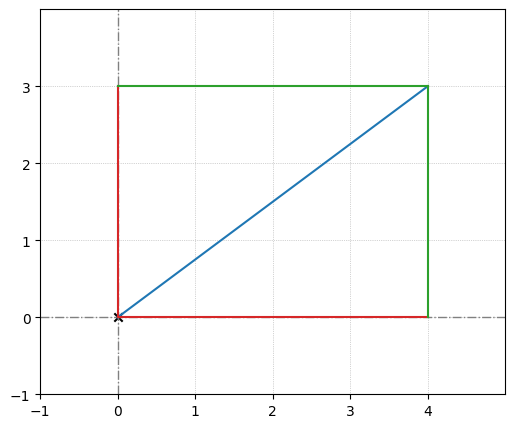

In [9]:
from utils.draw.component import Color, Segment2D, draw2d

draw2d(
    [
        Segment2D((0, 0), (4, 3), color=Color.blue()),  # 绘制 (4, 3) 向量的长度
        Segment2D(
            (0, 0), (4, 0), color=Color.red()
        ),  # 绘制 (4, 3) 向量在 x 轴的分量 (4, 0)
        Segment2D(
            (0, 0), (0, 3), color=Color.red()
        ),  # 绘制 (4, 3) 向量在 y 轴的分量 (0, 3)
        Segment2D((4, 0), (4, 3), color=Color.green()),
        Segment2D((0, 3), (4, 3), color=Color.green()),
    ]
)

**知识:** 通过勾股定理, 即可求出一个二维向量的长度


In [10]:
import math

from utils.typedef import Number, Vector2D


def length(v: Vector2D) -> Number:
    """计算一个二维向量的长度

    Args:
        `v` (`Vector2D`): 一个向量

    Returns:
        `Number`: 向量长度
    """
    return math.sqrt(v[0] ** 2 + v[1] ** 2)

In [11]:
from utils.vector import length

v = (4, 3)
print(f"v={v}")

# 计算向量的长度
print(f"|v|={length(v)}")

v=(4, 3)
|v|=5.0


### 2.3. 向量和标量

向量可以和一个标量 (scalar) 进行计算. 标量即一个普通数字, 不具备长度和方向.


**知识:** 向量和标量相乘的结果是对向量的**缩放**


In [12]:
from utils.typedef import Number, Vector2D


def scale(v: Vector2D, scalar: Number) -> Vector2D:
    """二维向量和标量相乘

    Args:
        `v` (`Vector2D`): 二维向量

    Returns:
        `Vector2D`: 缩放后的向量
    """
    return v[0] * scalar, v[1] * scalar

**知识:** 计算一个向量放大后的值


In [13]:
from utils.vector import scale

v = (1.2, -3.1)
print(f"v={v}")

scalar = 6.5

# 计算向量 v 和标量 scalar 相乘的结果
r = scale(scalar, v)
print(f"6.5*v={r}")

v=(1.2, -3.1)
6.5*v=(7.8, -20.150000000000002)


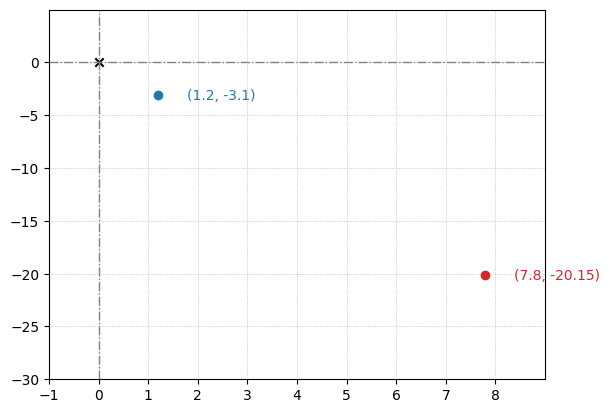

In [14]:
from utils.vector import as_vector2d, scale
from utils.draw.component import Color, Points2D, draw2d

v = (1.2, -3.1)
scalar = 6.5

r = as_vector2d(scale(scalar, v))

# 绘制原始向量和放大后的向量
draw2d(
    [
        Points2D([v], color=Color.blue()),  # 绘制原始向量, 蓝色
        Points2D([r], color=Color.red()),  # 绘制放大后的向量, 红色
    ],
    grid=(1, 5),
    nice_aspect_ratio=False,
)

In [15]:
from utils.vector import scale

v = (6, 4)
print(f"v={v}")

scalar = -0.5

# 计算向量 v 和标量 scalar 相乘的结果
r = scale(scalar, v)
print(f"0.5*v={r}")

v=(6, 4)
0.5*v=(-3.0, -2.0)


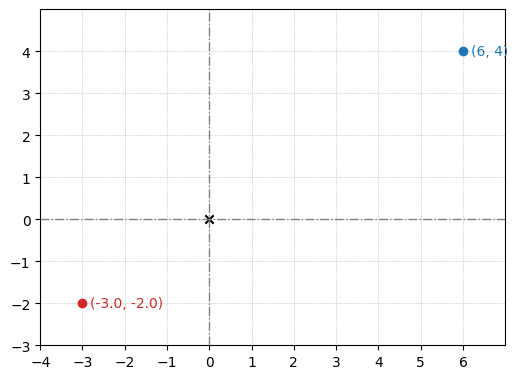

In [16]:
from utils.vector import as_vector2d, scale
from utils.draw.component import Color, Points2D, draw2d

v = (6, 4)
scalar = -0.5

r = as_vector2d(scale(scalar, v))

# 绘制原始向量和放大后的向量
draw2d(
    [
        Points2D([v], color=Color.blue()),  # 绘制原始向量, 蓝色
        Points2D([r], color=Color.red()),  # 绘制放大后的向量, 红色
    ]
)

### 2.4. 向量运算


**知识:** 将多个二维向量相加, 得到新的二维向量


In [17]:
from utils.typedef import Vector2D


def add(*vectors: Vector2D) -> Vector2D:
    """将一个二维向量集合中的所有向量进行相加后返回结果

    Args:
        `vectors` (`Iterable[Vector2D]`): 向量集合

    Returns:
        `Vector2D`: 所有向量相加后的结果
    """
    x, y = 0, 0
    for v in vectors:
        x += v[0]
        y += v[1]

    return (x, y)

In [18]:
from utils.vector import add

# 二维向量集合
vs = [
    (1, 2),
    (2, 4),
    (3, 6),
    (4, 8),
]
print(f"vs={vs}")


# 将向量集合中的所有向量相加, 得到一个结果向量
r = add(*vs)
print(f"∑vs={r}")

vs=[(1, 2), (2, 4), (3, 6), (4, 8)]
∑vs=(10, 20)


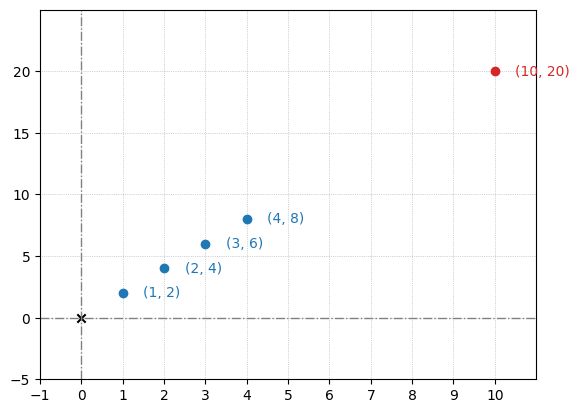

In [19]:
from utils.vector import add, as_vector2d
from utils.draw.component import Color, Points2D, draw2d

vs = [
    (1, 2),
    (2, 4),
    (3, 6),
    (4, 8),
]

r = as_vector2d(add(*vs))

# 查看原向量集合的点和相加后得到的向量点
draw2d(
    [
        Points2D(vs, color=Color.blue()),  # 原向量集合包含的点, 蓝色
        Points2D([r], color=Color.red()),  # 向量集合中所有向量相加后的结果, 红色
    ],
    grid=(1, 5),
    nice_aspect_ratio=False,
)

**知识:** 对向量集合中的每个点进行位置移动

In [20]:
from typing import Iterable, List

from utils.typedef import Vector2D
from utils.vector import add, as_vector2d


def translate(offset: Vector2D, vectors: Iterable[Vector2D]) -> List[Vector2D]:
    """移动一个向量集合中的每个向量

    最终, 向量组成的形态不变, 但向量的位置会发生变化

    Args:
        `offset` (`Vector2D`): 向量偏移量
        `vectors` (`Iterable[Vector2D]`): 向量集合

    Returns:
        `List[Vector2D]`: 移动位置后的向量集合
    """
    return [as_vector2d(add(v, offset)) for v in vectors]

In [21]:
from utils.vector import translate

# 定义原向量集合
vs = [
    (0, 0),
    (0, 1),
    (-3, -3),
]

# 定义要移动的偏移量
offset = (1, 1)
print(f"vs={vs}, offset={offset}")

# 对向量进行移动
r = translate(offset, vs)
print(f"vs->offset={r}")

vs=[(0, 0), (0, 1), (-3, -3)], offset=(1, 1)
vs->offset=[(1, 1), (1, 2), (-2, -2)]


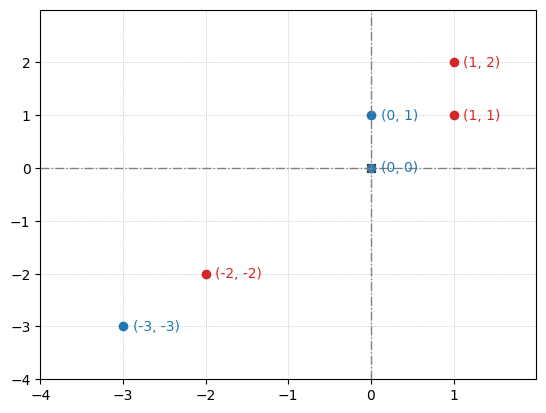

In [22]:
from utils.vector import as_vector2d, translate
from utils.draw.component import Color, Points2D, draw2d

# 定义原向量集合
vs = [
    (0, 0),
    (0, 1),
    (-3, -3),
]

# 定义要移动的偏移量
offset = (1, 1)

# 对向量进行移动
r = [as_vector2d(v) for v in translate(offset, vs)]

# 查看向量移动后和原向量的比较
draw2d(
    [
        Points2D(vs, color=Color.blue()),  # 绘制原始向量, 蓝色
        Points2D(r, color=Color.red()),  # 绘制放大后的向量, 红色
    ],
    nice_aspect_ratio=False,
)

**练习:** 通过向量位移, 将前面绘制的恐龙图形复制 100 次

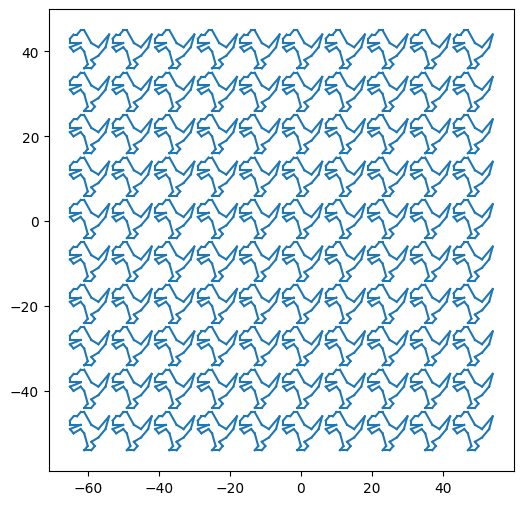

In [23]:
from utils.vector import as_vector2d, translate
from utils.draw.component import Color, Polygon2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 定义 100 只恐龙图形的偏移向量, cspell: disable
translations = [
    (12 * x, 10 * y)  # 设定 x 和 y 轴的偏移
    for x in range(-5, 5)  # 设定 x 轴的偏移计算范围
    for y in range(-5, 5)  # 设定 y 轴的偏移计算范围
]

dinos = [
    # 将 dino_vectors 中的恐龙图形的每个向量进行偏移
    Polygon2D([as_vector2d(v) for v in translate(t, dino_vectors)], color=Color.blue())
    for t in translations
]

# 绘制偏移后的 100 只恐龙
draw2d(
    dinos,
    origin=False,
    grid=None,
    axes=False,
)

**练习:** 在 `dino_vectors` 向量集合中, 找到两个向量见的最长距离

可以通过 `max` 函数配合 `length` 函数 (通过勾股定理计算两点距离的函数) 快速得到结果

In [24]:
from utils.vector import length

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 通过 length 函数计算向量集合中两两向量的距离, 再通过 max 函数计算最大的那个
max(dino_vectors, key=length)

(6, 4)

**练习:** 对于向量 $\omega$, 点坐标为 $(\sqrt2, \sqrt3)$, 计算 $\omega\cdot\pi$ 的近似结果

In [25]:
import math
from utils.vector import scale

# 定义 w 向量
v = (math.sqrt(2), math.sqrt(3))
print(f"v={v}")

# 向量放大 pi
v_scaled = scale(math.pi, v)
print(f"π*v={v_scaled}")

v=(1.4142135623730951, 1.7320508075688772)
π*v=(4.442882938158366, 5.441398092702653)


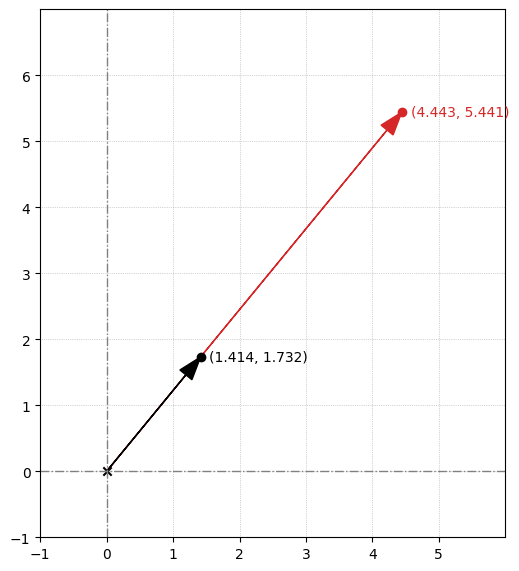

In [26]:
import math

from utils.vector import as_vector2d, scale
from utils.draw.component import Arrow2D, Color, Points2D, draw2d

# 定义 w 向量
v = (math.sqrt(2), math.sqrt(3))

# 向量放大 pi
v_scaled = as_vector2d(scale(math.pi, v))

# 以箭头图形绘制缩放后和缩放前的向量
draw2d(
    [
        Points2D([v_scaled], color=Color.red()),
        Arrow2D(v_scaled, color=Color.red()),  # 缩放后的向量
        Points2D([v], color=Color.black()),
        Arrow2D(v, color=Color.black()),  # 缩放前的向量
    ]
)

**练习:** 对于向量 $z = (-1, 1)$ 和 $v = (1, 1)$, 且 $r$ 和 $s$ 是两个标量, 且符合 $-3 < r < 3$ 和 $-1 < s < 1$. 则标记 $r\cdot z + s \cdot v$ 结果在坐标系上的可能的位置

由于标量 $r$ 和 $s$ 的范围已被限定, 则所有的向量点都会位于一个顶点为 $(2, 4), (4, 2), (2, -4), (4, -2)$ 的平行四边形中

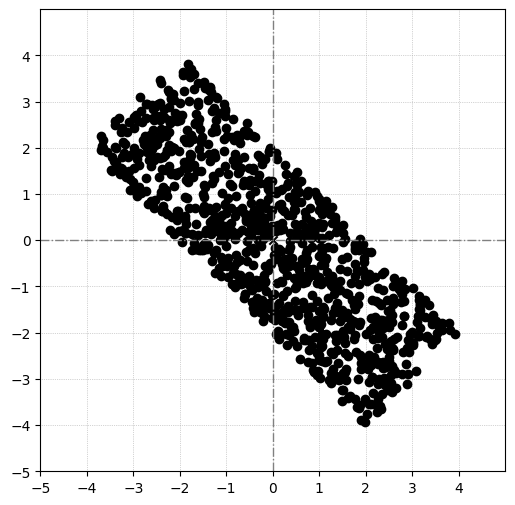

In [27]:
from random import uniform

from utils.typedef import Number
from utils.vector import add, as_vector2d, scale
from utils.draw.component import Points2D, draw2d

z = (-1, 1)
v = (1, 1)


def random_r() -> Number:
    return uniform(-3, 3)


def random_s() -> Number:
    return uniform(-1, 1)


possibilities = [
    as_vector2d(add(scale(random_r(), z), scale(random_s(), v))) for _ in range(1000)
]

draw2d([Points2D(possibilities, show_coord=False)])

## 3. 向量的距离

**知识:** 求两个向量的距离, 两个向量的距离即两个向量的差向量的长度 (从原点计算)

In [28]:
from utils.typedef import Vector2D


def subtract(v1: Vector2D, v2: Vector2D) -> Vector2D:
    """计算两个向量的差值

    向量差值即向量的各分量差值组成的向量值

    Args:
        `v1` (`Vector2D`): 第一个向量
        `v2` (`Vector2D`): 第二个向量

    Returns:
        `Vector2D`: 两个向量差
    """
    return (v1[0] - v2[0], v1[1] - v2[1])

In [29]:
from utils.typedef import Number, Vector2D


def distance(v1: Vector2D, v2: Vector2D) -> Number:
    """计算两个向量的距离

    两个向量距离即两个向量的差的长度

    Args:
        `v1` (`Vector2D`): 第一个向量
        `v2` (`Vector2D`): 第二个向量

    Returns:
        Number: 两个向量的距离
    """
    return length(subtract(v1, v2))

In [30]:
from utils.vector import distance

v1, v2 = (20, 10), (30, 20)
print(f"v1={v1}, v2={v2}")

# 计算两个向量的距离
r = distance(v1, v2)
print(f"distance={r}")

v1=(20, 10), v2=(30, 20)
distance=14.142135623730951


**知识:** 如果对一组向量两两求距离并相加, 加上首位两个向量的距离, 即可计算一组向量围成的图形的周长

In [31]:
from typing import Sequence

from utils.typedef import Number, Vector2D


def perimeter(vs: Sequence[Vector2D]) -> Number:
    """计算一组向量围成的图形的周长

    Args:
        `vectors` (`Iterable[Vector2D]`): 一组向量

    Returns:
        `Number`: 图形周长
    """
    distances = [distance(vs[i], vs[(i + 1) % len(vs)]) for i in range(len(vs))]
    return sum(distances)

 求一个正方形周长

square=[(1, 0), (1, 1), (0, 1), (0, 0)]


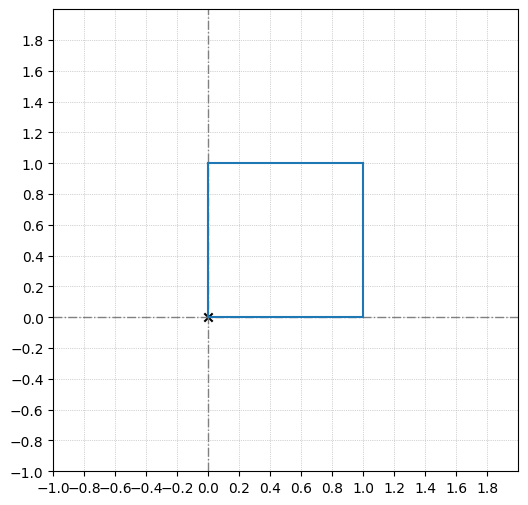

C=4.0


In [32]:
from utils.vector import perimeter
from utils.draw.component import Polygon2D, draw2d

# 定义一个表示正方形的向量集合
square = [
    (1, 0),
    (1, 1),
    (0, 1),
    (0, 0),
]
print(f"square={square}")

# 绘制正方形图形
draw2d([Polygon2D(square)], grid=(0.2, 0.2))

# 求正方形周长
r = perimeter(square)
print(f"C={r}")

求恐龙图形的周长

In [33]:
from utils.vector import perimeter

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 计算恐龙图形的周长
perimeter(dino_vectors)

44.77115093694564

**练习:** 已知两个向量的距离, 求可能得位移

设向量 $u = (1, -1)$, 向量 $v = (n, m)$, 且 $n > m$, 如果 $u, v$ 的距离是 `13`, 求从 $u$ 到 $v$ 的位移

In [34]:
from typing import Optional

from utils.typedef import Vector2D
from utils.vector import as_vector, distance, subtract

r: Optional[Vector2D] = None

for n in range(-12, 15):  # n 在 1 的前后 13 个单位内
    for m in range(-14, 13):  # m 在 -1 的前后 13 个单位内
        if distance((n, m), (1, -1)) == 13 and n > m > 0:
            r = (n, m)
            break

assert r is not None

print(f"Found vector is: {r}")  # 输出找到符合要求的向量值

offset = subtract(as_vector(r), (1, -1))
print(f"Offset from (1, -1) is: {offset}")  # 输出所得向量和 (1, -1) 的位移

Found vector is: (13, 4)
Offset from (1, -1) is: (12, 5)
